In [19]:
# --- CELDA 0: SETUP INICIAL ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuraciones generales
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")

# Rutas del proyecto (ajusta si estás en otra carpeta)
ROOT = Path.cwd().parent if "notebooks" in str(Path.cwd()) else Path.cwd()
OUT_FIG = ROOT / "outputs" / "figures"
OUT_FIG.mkdir(parents=True, exist_ok=True)

print("Entorno configurado. Directorio raíz:", ROOT)


Entorno configurado. Directorio raíz: c:\Users\Gerson\Desktop\gallstone_ml


In [ ]:
# --- CELDA 1: CARGA DEL DATASET ---
import pandas as pd
df = pd.read_excel(r"C:\Users\Gerson\Documents\dataset-uci.xlsx")  

print("Shape:", df.shape)
df.head()


Shape: (319, 39)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,27.1,52.9,21.2,31.7,40.0,19.2,80.84,18.88,9,3.7,71.4,23.4,17.8,10.6,39.7,0,102.0,250.0,175.0,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,30.5,43.1,19.5,23.6,45.0,32.8,67.20,16.68,15,3.2,60.3,38.8,31.0,18.4,32.7,0,94.0,172.0,108.0,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,31.2,47.2,20.1,27.1,43.0,27.3,72.67,16.35,15,3.3,62.9,41.7,24.9,16.2,34.0,0,103.0,179.0,124.0,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,24.0,41.4,17.0,24.4,41.0,15.8,84.19,16.90,6,2.9,54.1,9.0,10.7,6.5,29.2,1,69.0,173.0,73.0,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,28.3,51.4,20.0,31.4,39.0,20.0,80.02,16.81,8,3.5,68.2,28.6,17.9,10.4,37.4,2,109.0,205.0,154.0,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [37]:
# --- CELDA 2: INFO RÁPIDA ---
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [38]:
# --- CELDA 3: DESCRIPTIVO Y NULOS ---
df.describe().T
df.isnull().sum().sum()  # debería ser 0


np.int64(0)

In [39]:
# --- CELDA 4: LISTA DE COLUMNAS ---
list(df.columns)


['Gallstone Status',
 'Age',
 'Gender',
 'Comorbidity',
 'Coronary Artery Disease (CAD)',
 'Hypothyroidism',
 'Hyperlipidemia',
 'Diabetes Mellitus (DM)',
 'Height',
 'Weight',
 'Body Mass Index (BMI)',
 'Total Body Water (TBW)',
 'Extracellular Water (ECW)',
 'Intracellular Water (ICW)',
 'Extracellular Fluid/Total Body Water (ECF/TBW)',
 'Total Body Fat Ratio (TBFR) (%)',
 'Lean Mass (LM) (%)',
 'Body Protein Content (Protein) (%)',
 'Visceral Fat Rating (VFR)',
 'Bone Mass (BM)',
 'Muscle Mass (MM)',
 'Obesity (%)',
 'Total Fat Content (TFC)',
 'Visceral Fat Area (VFA)',
 'Visceral Muscle Area (VMA) (Kg)',
 'Hepatic Fat Accumulation (HFA)',
 'Glucose',
 'Total Cholesterol (TC)',
 'Low Density Lipoprotein (LDL)',
 'High Density Lipoprotein (HDL)',
 'Triglyceride',
 'Aspartat Aminotransferaz (AST)',
 'Alanin Aminotransferaz (ALT)',
 'Alkaline Phosphatase (ALP)',
 'Creatinine',
 'Glomerular Filtration Rate (GFR)',
 'C-Reactive Protein (CRP)',
 'Hemoglobin (HGB)',
 'Vitamin D']

In [ ]:
# --- CELDA 5: TARGET CHECK ---
target = "Gallstone Status"  
df[target].value_counts(normalize=True)


Gallstone Status
0    0.504702
1    0.495298
Name: proportion, dtype: float64

In [60]:
# --- CELDA 6bis: CLASIFICACIÓN DETALLADA DE VARIABLES ---

# Variables del dataset-uci (según descripción oficial)
target = "Gallstone Status"

binary_vars = [
    "Coronary Artery Disease (CAD)",
    "Hypothyroidism",
    "Hyperlipidemia",
    "Diabetes Mellitus (DM)"
]

categorical_vars = [
    "Gender",
    "Comorbidity",
    "Hepatic Fat Accumulation (HFA)"
]

continuous_vars = [
    "Age", "Height", "Weight", "Body Mass Index (BMI)", "Total Body Water (TBW)",
    "Extracellular Water (ECW)", "Intracellular Water (ICW)",
    "Extracellular Fluid/Total Body Water (ECF/TBW)",
    "Total Body Fat Ratio (TBFR)", "Lean Mass (LM)", "Body Protein Content (Protein)",
    "Visceral Fat Rating (VFR)", "Bone MassBone Mass (BM)", "Muscle Mass (MM)",
    "Obesity", "Total Fat Content (TFC)", "Visceral Fat Area (VFA)",
    "Visceral Muscle Area (VMA)", "Glucose", "Total Cholesterol (TC)",
    "Low Density Lipoprotein (LDL)", "High Density Lipoprotein (HDL)",
    "Triglyceride", "Aspartat Aminotransferaz (AST)", "Alanin Aminotransferaz (ALT)",
    "Alkaline Phosphatase (ALP)", "Creatinine", "Glomerular Filtration Rate (GFR)",
    "C-Reactive Protein (CRP)", "Hemoglobin (HGB)", "Vitamin D"
]

print(f"Target: {target}")
print(f"Binarias: {len(binary_vars)} | Categóricas: {len(categorical_vars)} | Continuas: {len(continuous_vars)}")


Target: Gallstone Status
Binarias: 4 | Categóricas: 3 | Continuas: 31


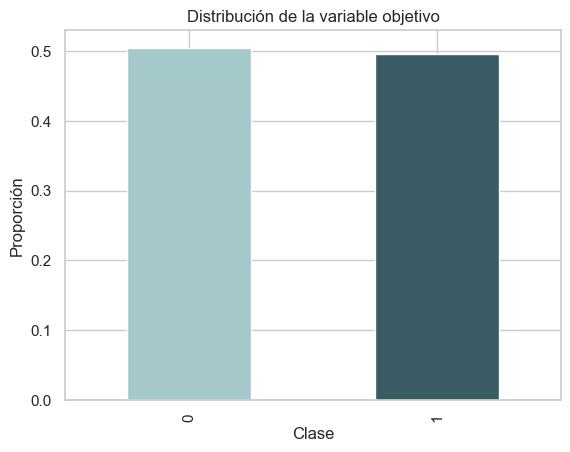

In [50]:
# --- CELDA 7: DISTRIBUCIÓN DEL TARGET ---
import matplotlib.pyplot as plt
import seaborn as sns

target = "Gallstone Status"  # cambia según el nombre real
df[target].value_counts(normalize=True).plot(kind="bar", color=["#A5C9CA", "#395B64"])
plt.title("Distribución de la variable objetivo")
plt.ylabel("Proporción")
plt.xlabel("Clase")
plt.show()


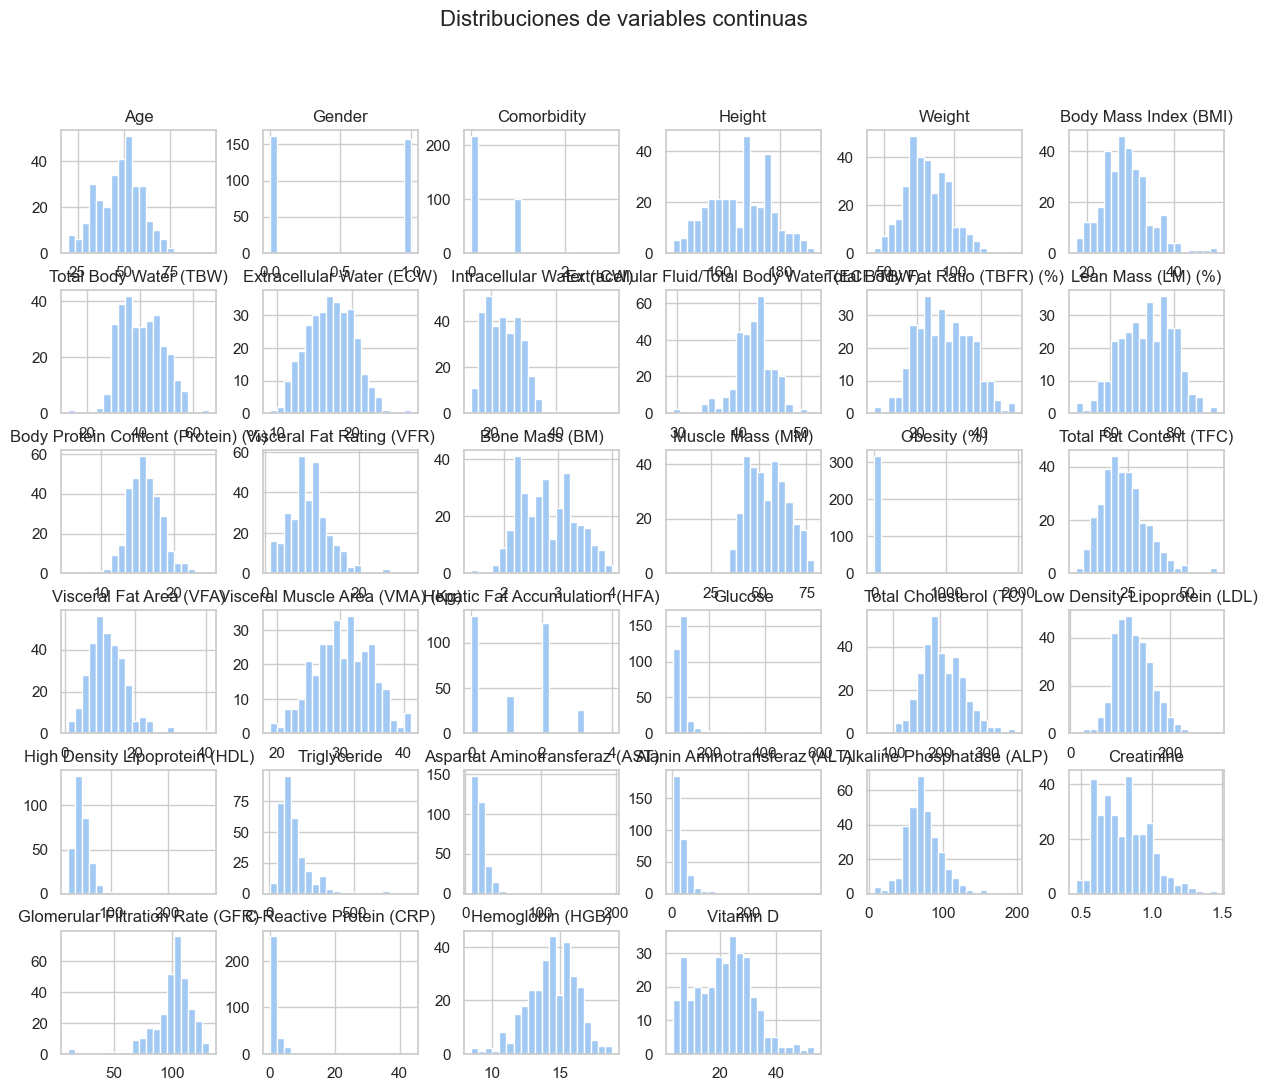

In [53]:
# --- CELDA 8: HISTOGRAMAS (SOLO CONTINUAS) ---
import matplotlib.pyplot as plt
import numpy as np

target = "Gallstone Status"

binary_vars = [
    "Coronary Artery Disease (CAD)",
    "Hypothyroidism",
    "Hyperlipidemia",
    "Diabetes Mellitus (DM)"
]

categorical_vars = [
    "Gender",
    "Comorbidity",
    "Hepatic Fat Accumulation (HFA)"
]

# Detecta numéricas y quita target + binarias + categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
continuous_auto = [c for c in num_cols if c not in set(binary_vars + [target])]

# Hist de continuas
df[continuous_auto].hist(figsize=(15, 12), bins=20)
plt.suptitle("Distribuciones de variables continuas", fontsize=16)
plt.show()


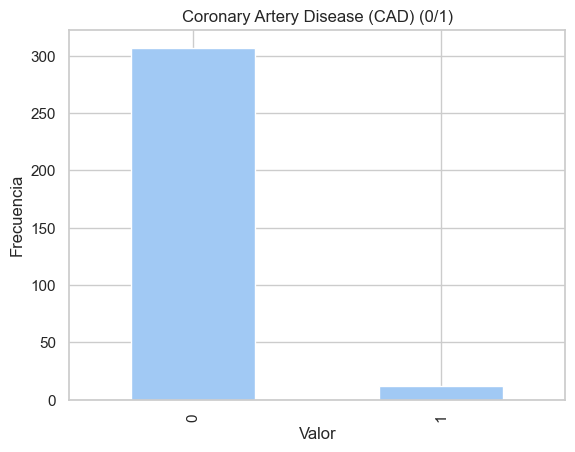

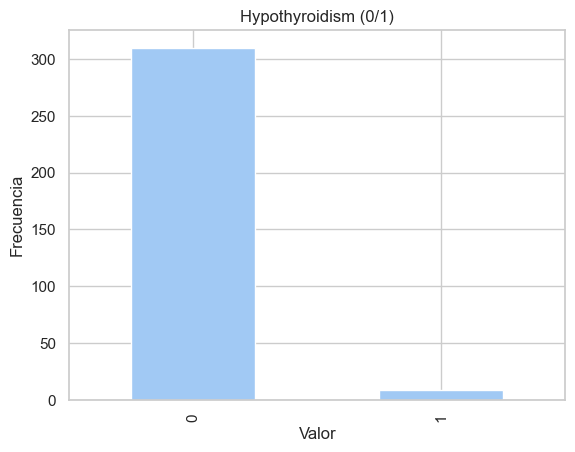

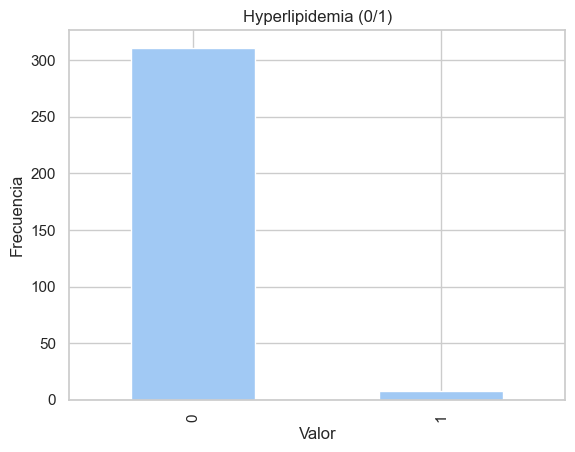

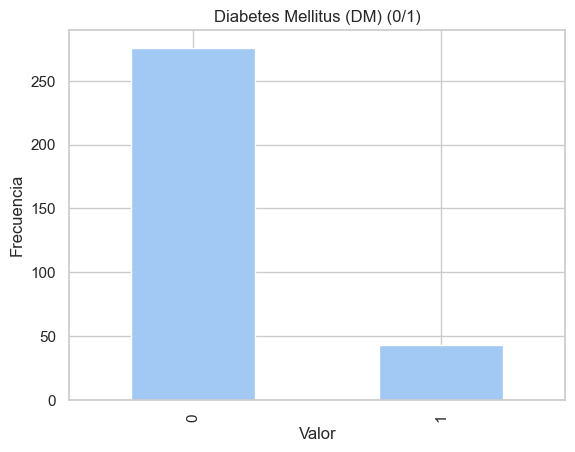

In [54]:
# --- CELDA 8b: FRECUENCIAS BINARIAS ---
import matplotlib.pyplot as plt

for col in binary_vars:
    if col in df.columns:
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"{col} (0/1)")
        plt.xlabel("Valor")
        plt.ylabel("Frecuencia")
        plt.show()


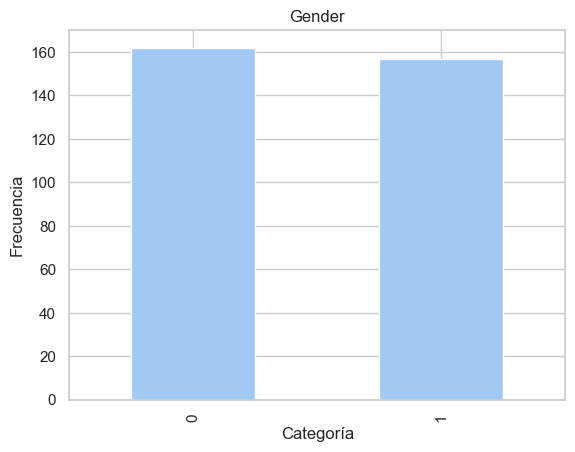

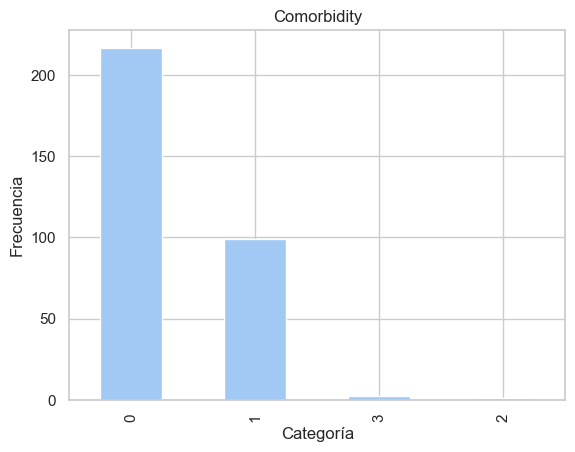

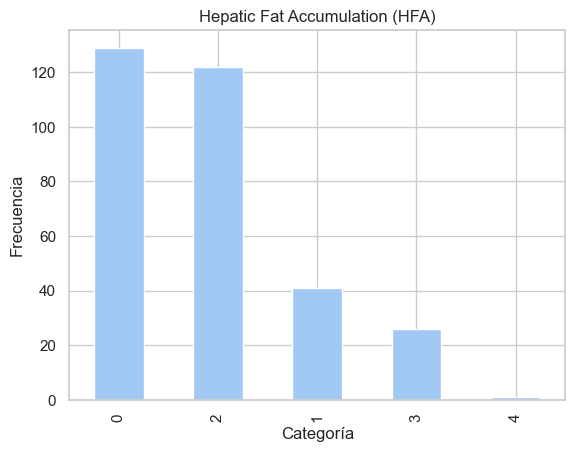

In [55]:
# --- CELDA 8c: FRECUENCIAS CATEGÓRICAS ---
for col in categorical_vars:
    if col in df.columns:
        df[col].value_counts().plot(kind="bar")
        plt.title(col)
        plt.xlabel("Categoría")
        plt.ylabel("Frecuencia")
        plt.show()


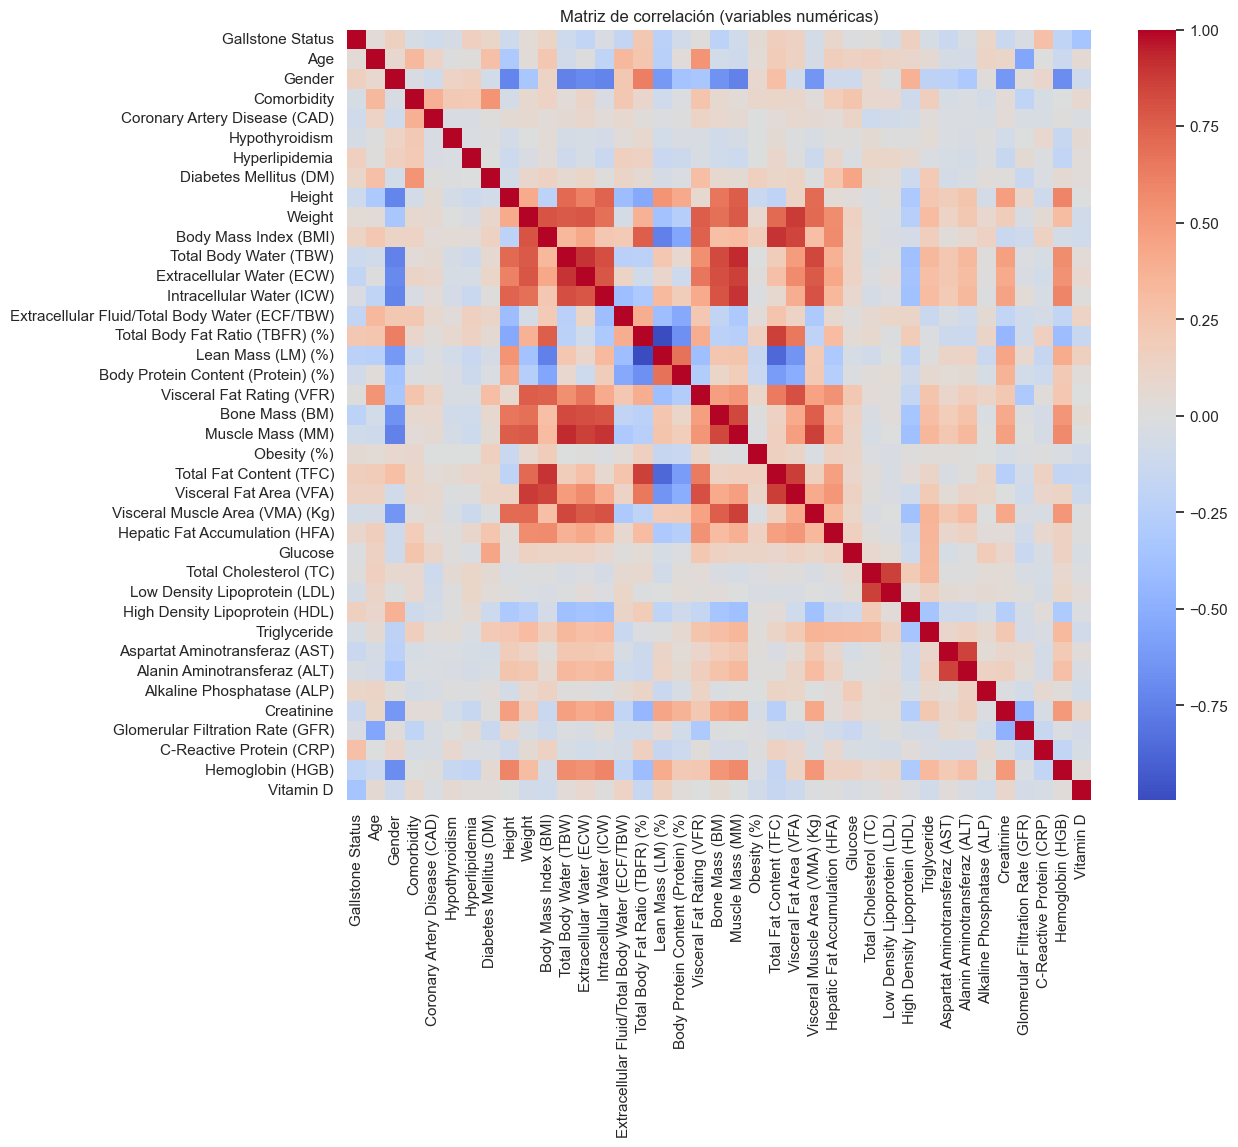

Gallstone Status                   1.000000
C-Reactive Protein (CRP)           0.281995
Total Body Fat Ratio (TBFR) (%)    0.225470
Total Fat Content (TFC)            0.170158
Hyperlipidemia                     0.161901
High Density Lipoprotein (HDL)     0.158622
Gender                             0.153483
Visceral Fat Area (VFA)            0.140397
Body Mass Index (BMI)              0.121507
Alkaline Phosphatase (ALP)         0.109882
Name: Gallstone Status, dtype: float64

In [56]:
# --- CELDA 9: MATRIZ DE CORRELACIÓN ---
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

# correlaciones con el target
corr_target = corr[target].sort_values(ascending=False)
corr_target.head(10)


C:\Users\Gerson\AppData\Local\Temp\ipykernel_49300\283650115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="pastel")


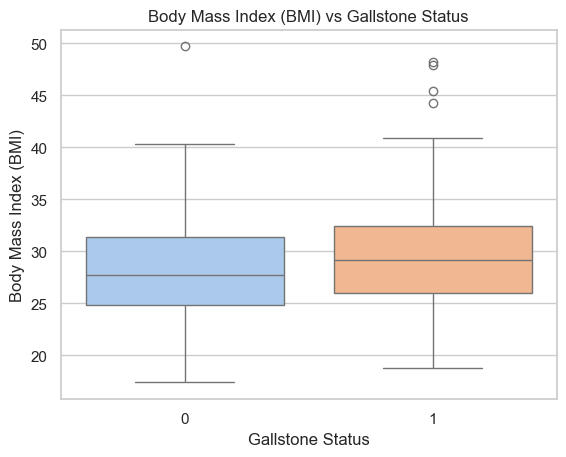

C:\Users\Gerson\AppData\Local\Temp\ipykernel_49300\283650115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="pastel")


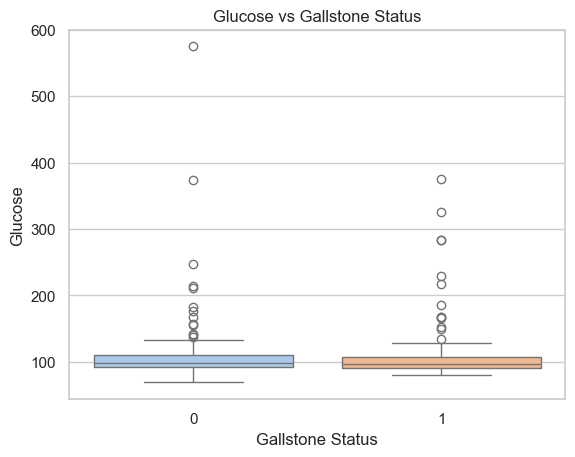

C:\Users\Gerson\AppData\Local\Temp\ipykernel_49300\283650115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="pastel")


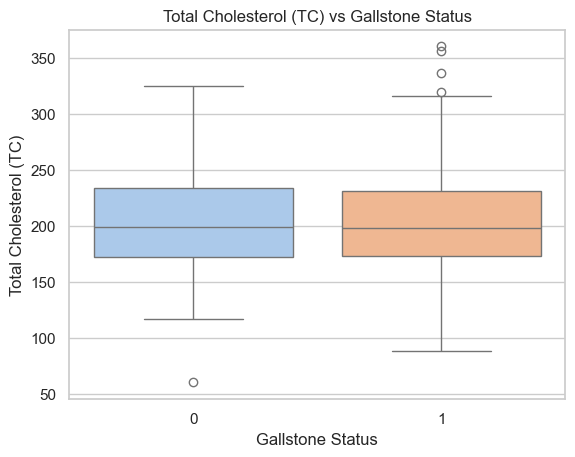

C:\Users\Gerson\AppData\Local\Temp\ipykernel_49300\283650115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="pastel")


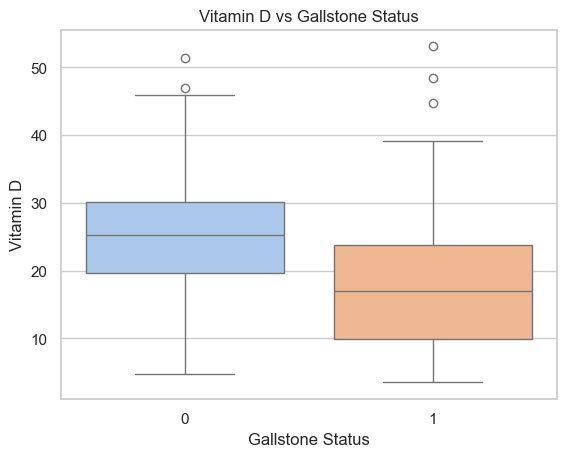

In [57]:
# --- CELDA 10: BOX PLOTS ---
for col in ["Body Mass Index (BMI)", "Glucose", "Total Cholesterol (TC)", "Vitamin D"]:  # cambia nombres según tu dataset
    if col in df.columns:
        sns.boxplot(x=target, y=col, data=df, palette="pastel")
        plt.title(f"{col} vs {target}")
        plt.show()


In [61]:
import sys
sys.exit()


SystemExit: 

C:\Users\Gerson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
